In [1]:
import os
import gzip
import errno
import shutil
import pydicom
import collections
import numpy as np

from PIL import Image
import nibabel as nib

import tifffile as tiff
from tifffile import imsave

import matplotlib.pyplot as plt

from skimage.transform import resize
from torch.utils import data
#
import torch
import random
import numpy as np
import os
import torch.nn as nn
import glob
import tifffile as tiff
import torch.nn.functional as F
# ==================================
from NNUtils import CustomDataset_OCT

/home/moucheng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/moucheng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/moucheng/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/moucheng/anaconda3/lib/python3.7/site-packages/tensorflow/python/frame

In [2]:
data_direcotry = '/home/moucheng/projects_data/OCT/'
# =======================================================
train_image_folder = data_direcotry + 'train/' + 'images'
train_label_folder = data_direcotry + 'train/' + 'masks'
#
train_dataset = CustomDataset_OCT(train_image_folder, train_label_folder, teacher_student=False, transforms='all')

print(len(train_dataset))

print(train_dataset)

# trainloader = data.DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=2, drop_last=False)
index = 20
#
image, label, label_name = train_dataset[index]
#

726


(1, 512, 512)
(1, 512, 512)


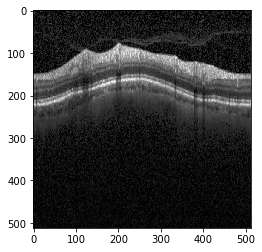

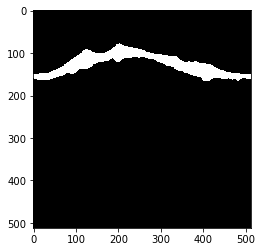

255.0
1.0


In [3]:
print(image.shape)
print(label.shape)

plt.imshow(image[0, :, :], cmap='gray')
plt.show()

plt.imshow(label[0, :, :], cmap='gray')
plt.show()

print(image.max())
print(label.max())